# Bike Sharing Dataset - Casestudy

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

#### About Dataset

##### Overview

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

###### Data Fields

**datetime:** hourly date + timestamp

**season:**  1 = spring, 2 = summer, 3 = fall, 4 = winter

**holiday:** whether the day is considered a holiday

**workingday:** whether the day is neither a weekend nor holiday

**weather:**
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp:** temperature in Celsius

**atemp:** "feels like" temperature in Celsius

**humidity:** relative humidity

**windspeed:** wind speed

**casual:** number of non-registered user rentals initiated

**registered:** number of registered user rentals initiated

**bike_count:** number of total rentals (Dependent Variable)

In [2]:
#importing required libraries

import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
df = pd.read_csv('data/bike_share_data.csv')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,bike_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,bike_count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


###  Univariate Analysis:

In [6]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'bike_count'],
      dtype='object')

In [7]:
# Season

# Categorical or Numerical?

# df.season.value_counts() or

# df.season.describe()

plt.bar(df.season)

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
season_freq = df.season.value_counts().reset_index()

plt.bar(
    x=season_freq.index, 
    height=season_freq.season,
    tick_label = [1,2,3,4]
)

plt.xlabel('Seasons')
plt.ylabel('Season Count')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title('Season Frequency', fontdict={'fontsize':15, 'fontweight':50})

plt.show()

In [8]:
df.season.mean()

2.5066139996325556

In [9]:
df.groupby('season').agg('')

AttributeError: '' is not a valid function for 'DataFrameGroupBy' object

In [10]:
# Seaborn way

sns.barplot(x=season_freq.index, y=season_freq.season)

# You can also use matplotlib plot properties to customize Seaborn plots.

# for example

plt.xticks(rotation=45)

plt.show()

NameError: name 'season_freq' is not defined

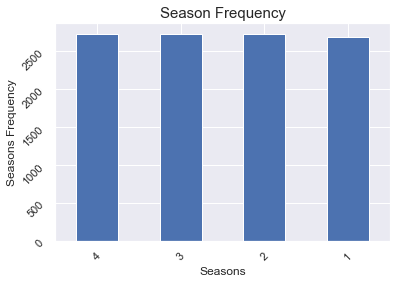

In [11]:
# Pandas Direct Support for Plotting

sns.set()

tmp = df.season.value_counts()

tmp.plot(
    kind='bar',
    )

plt.xlabel('Seasons')
plt.ylabel('Seasons Frequency')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title('Season Frequency', fontdict={'fontsize':15, 'fontweight':50})

plt.show()


In [12]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'bike_count'],
      dtype='object')

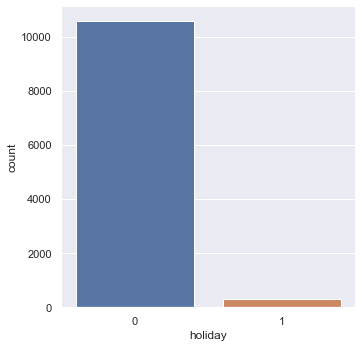

In [13]:
# Holiday Distribution

sns.catplot(x='holiday',data=df,kind='count',height=5,aspect=1) # majority of data is for non holiday days.

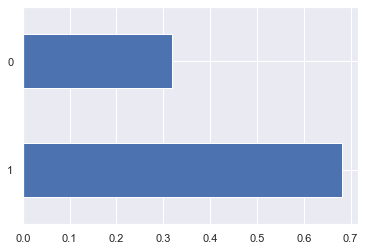

In [14]:
# Workingday Distribution

df.workingday.value_counts(normalize=True).plot(kind='barh')

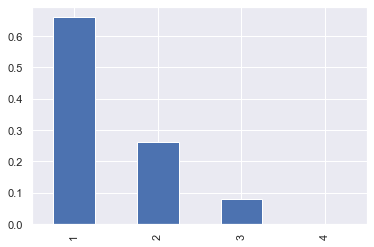

In [15]:
# Weather

df.weather.value_counts(normalize=True).plot(kind='bar')

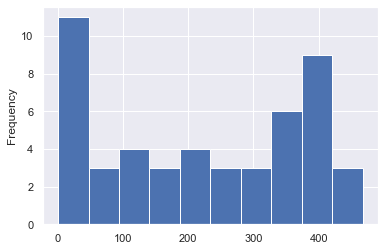

In [16]:
df.temp.value_counts().plot(kind='hist',bins=10)

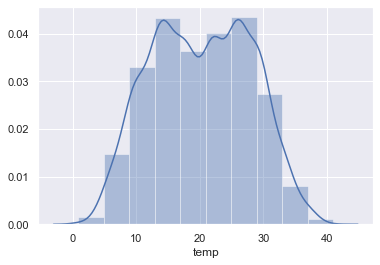

In [17]:
sns.distplot(df.temp, bins=10)

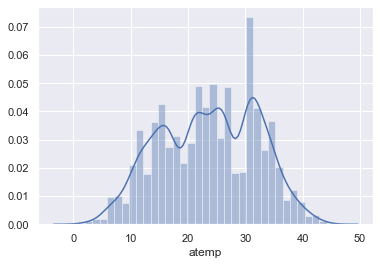

In [18]:
sns.distplot(df.atemp)

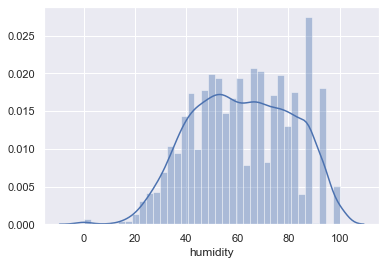

In [19]:
sns.distplot(df.humidity)

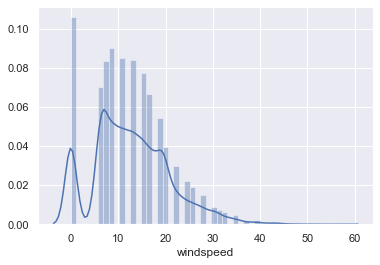

In [20]:
sns.distplot(df.windspeed)

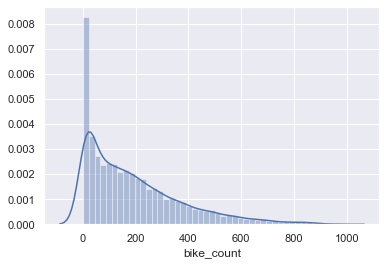

In [21]:
sns.distplot(df.bike_count)

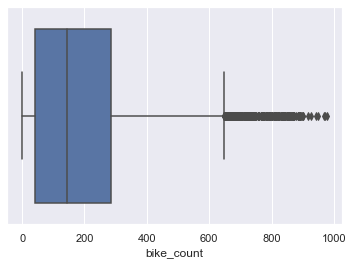

In [22]:
sns.boxplot(df.bike_count)

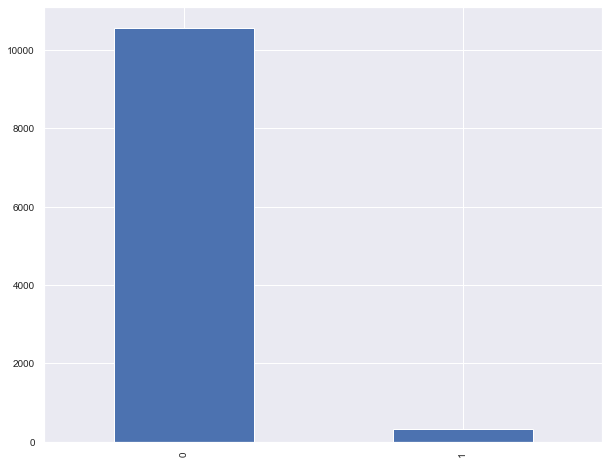

In [23]:
hcount = df.holiday.value_counts().round(2)

plt.figure(figsize = (10,8))

ax= plt.subplot()

hcount.plot(kind = 'bar')
    
ax.tick_params(axis='both', which='major', labelsize=10)

### Feature Engineering:


Create new columns "date,"hour","weekDay","month" from "datetime" column.

Change the datatype of "season","holiday","workingday" and weather to category.

In [24]:
df["date"] = df.datetime.apply(lambda x : x.split()[0])

df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])

df["weekday"] = df.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

df["month"] = df.date.apply(lambda x : calendar.month_name[datetime.strptime(x,"%Y-%m-%d").month])

df["season"] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

df["weather"] = df.weather.map({1: "Clear", 
                                2: "Cloudy ", 
                                3: "Snow", 
                                4: "HeavyRain" }
                              )                                

In [25]:
#Drop the datetime column as we already extracted useful features from it.

df.drop(['datetime'], axis=1, inplace=True)

In [26]:
category_vars = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in category_vars:
    df[var] = df[var].astype("category")

In [27]:
df.season.head()

0    Spring
1    Spring
2    Spring
3    Spring
4    Spring
Name: season, dtype: category
Categories (4, object): [Fall, Spring, Summer, Winter]

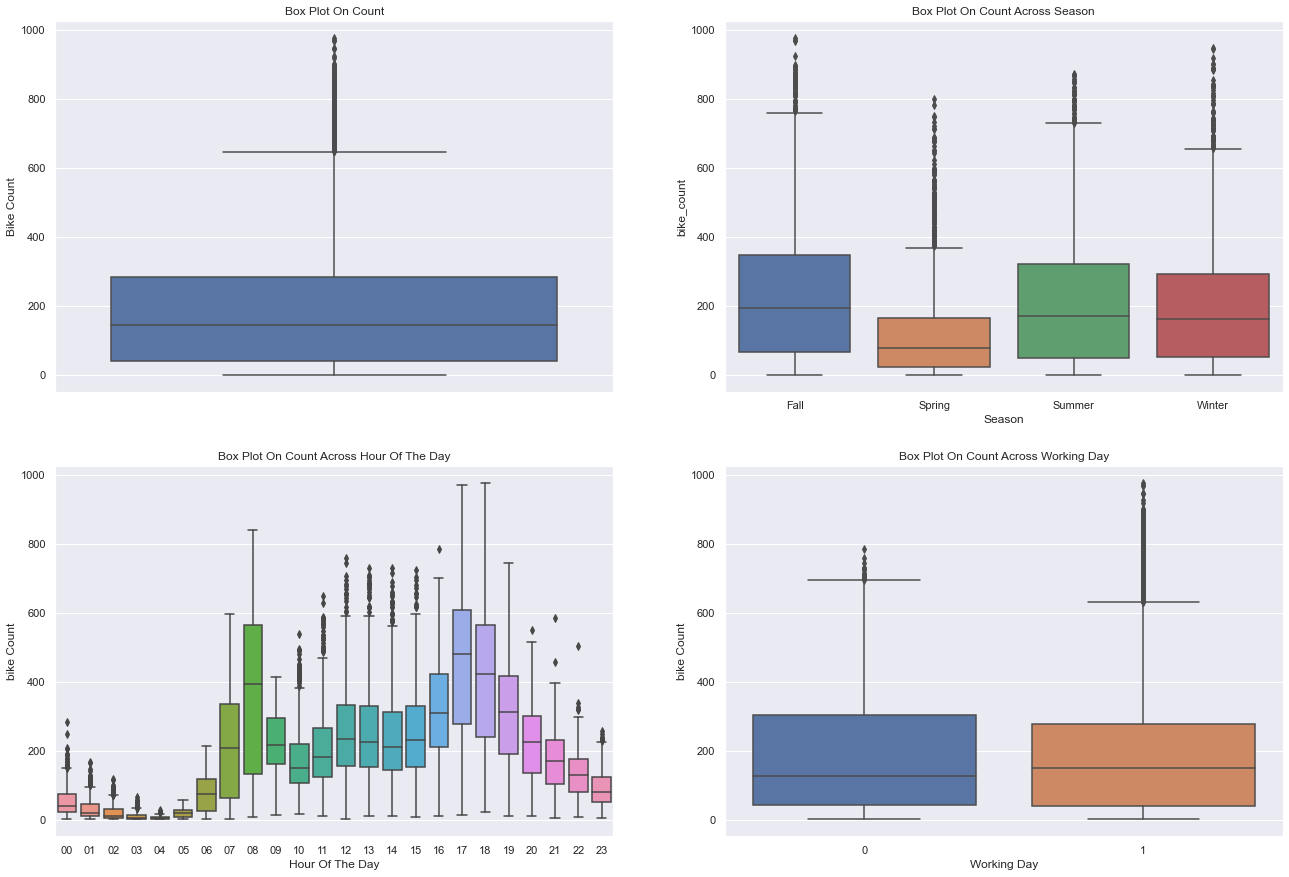

In [28]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(22, 15)
sns.boxplot(data=df,y="bike_count",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="bike_count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="bike_count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="bike_count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Bike Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', label='bike Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='bike Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='bike Count',title="Box Plot On Count Across Working Day")

plt.show()

In [29]:
df_without_outliers = df[np.abs(df["bike_count"]-df["bike_count"].mean())<=(3*df["bike_count"].std())] 

In [30]:
(df.shape)[0]-(df_without_outliers.shape)[0]

147

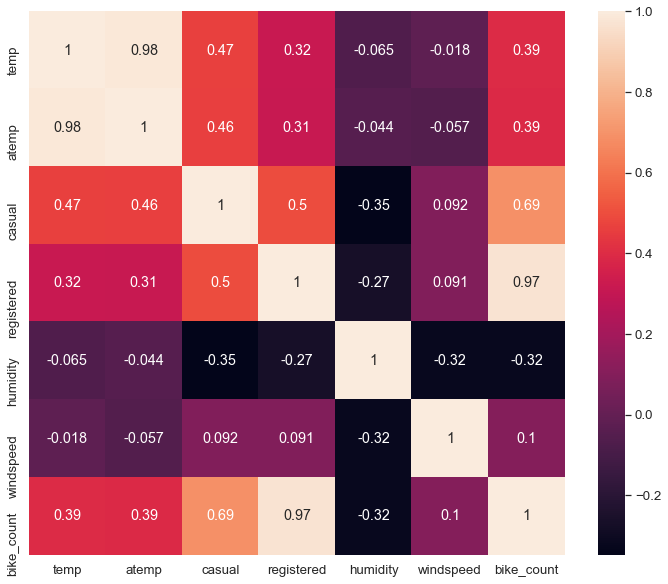

In [31]:
# Correlation Plot

plt.figure(figsize=(12,10))

sns.set(font_scale=1.2)

correlation_matrix = df[["temp","atemp","casual","registered","humidity","windspeed","bike_count"]].corr()
ax = sns.heatmap(correlation_matrix, annot=True)

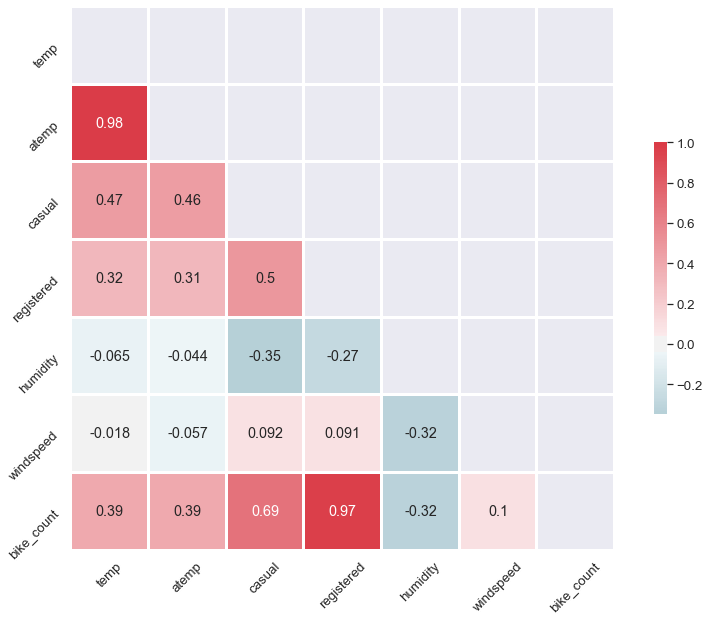

In [32]:
import seaborn as sns
# Compute the correlation matrix


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=2, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, 
           #fontsize="10"
          )
plt.yticks(rotation=45, 
           #fontsize="10"
          )
#ax.set_xticks()
plt.show()

Inferences from heatmaps:

- self realtion i.e. of a feature to itself is equal to 1 as expected.

- temp and atemp are highly related as expected.

- humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

- also note that casual and working day are highly inversely related as you would expect.

- Also note that temp(or atemp) highly effects the count.

- registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

Text(0.5, 0, 'registered')

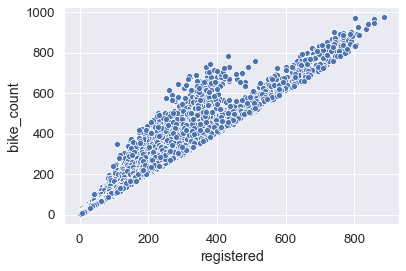

In [33]:
sns.scatterplot(x='registered', y='bike_count', data=df )

plt.xlabel('registered')

Text(0.5, 0, 'Temparature')

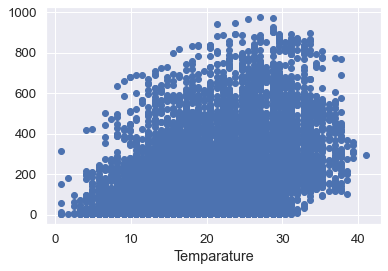

In [34]:
plt.scatter(x='temp', y='bike_count', data=df)

plt.xlabel('Temparature')

In [35]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'bike_count', 'date',
       'hour', 'weekday', 'month'],
      dtype='object')

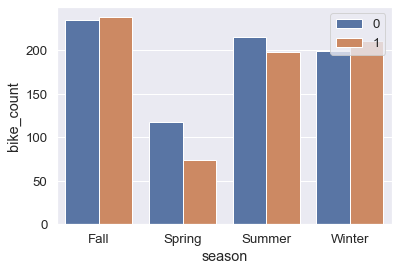

In [36]:
sns.barplot(
    x = 'season', 
    y = 'bike_count', 
    hue='holiday', 
    data = df,
    ci=None)

plt.legend(loc='upper right')

plt.show()

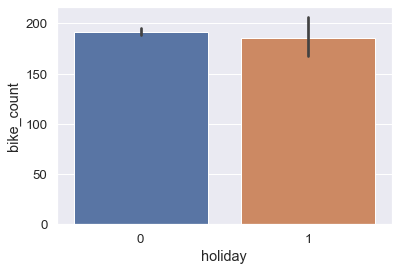

In [37]:
sns.barplot(x = 'holiday', y = 'bike_count',data = df)

plt.show()

In [38]:
df.groupby('holiday')['bike_count'].agg(trips='mean')

,trips
holiday,
0,191.741655
1,185.877814


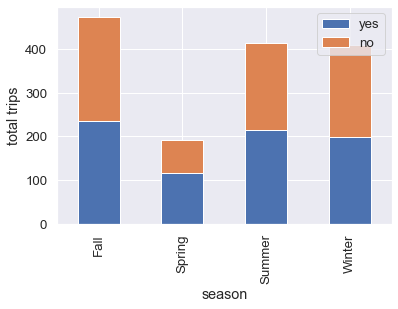

In [39]:
df.groupby(['season','holiday']).agg({'bike_count':'mean'}).unstack().plot(kind='bar',stacked=True)

plt.legend(['yes','no'], loc='upper right')

plt.ylabel('total trips')

plt.show()

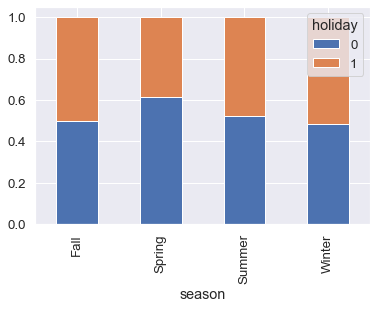

In [40]:
df1 = df.groupby(['season','holiday']).agg({'bike_count':'mean'}).unstack()

df1.columns = df1.columns.droplevel() 

df1.div(df1.sum(axis=1), axis=0).plot(kind='bar', stacked=True)

plt.show()

<Figure size 1440x360 with 0 Axes>

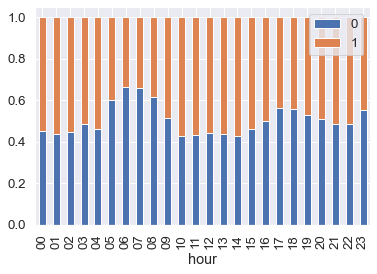

In [41]:
plt.figure(figsize=(20,5))

df1 = df.groupby(['hour','holiday']).agg({'bike_count':'mean'}).unstack()

df1.columns = df1.columns.droplevel()

df1.div(df1.sum(axis=1), axis=0).plot(kind='bar', stacked=True)

plt.legend(loc='upper right')

plt.show()

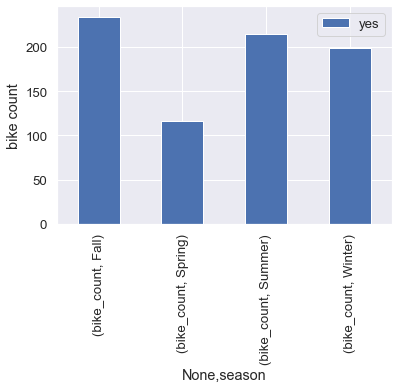

In [42]:
df.groupby('season').agg({'bike_count':'mean'}).unstack().plot(kind='bar',stacked=True)

plt.legend(['yes','no'], loc='upper right')

plt.ylabel('bike count')

plt.show()

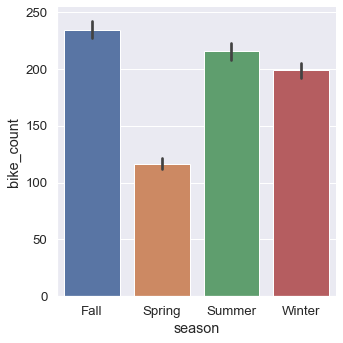

In [43]:
sns.catplot(x='season', y='bike_count', data=df, kind='bar')

In [44]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'bike_count', 'date',
       'hour', 'weekday', 'month'],
      dtype='object')

In [45]:
df.groupby('season')[['bike_count','registered']].agg({'bike_count':'mean', 'registered':'mean'})

,bike_count,registered
season,,
Fall,234.417124,182.196853
Spring,116.343261,100.853686
Summer,215.251372,167.804610
Winter,198.988296,170.407462


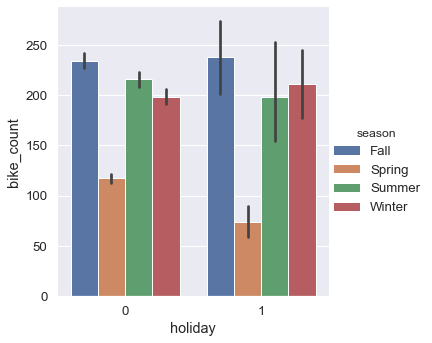

In [46]:
sns.catplot(x='holiday', y='bike_count', hue='season', data=df, kind='bar')

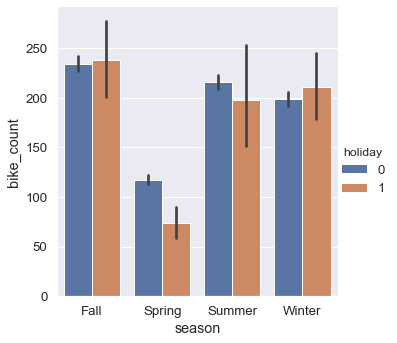

In [47]:
sns.catplot(x='season', y='bike_count', hue='holiday', data=df, kind='bar')

plt.savefig('season_holiday_bikecount.jpeg')

In [48]:
# TRY TO EXPLORE MORE FOR MORE INSIGHTS